## **MUGHEERA SALEEM**
# **361466 (PLANT VILLAGE DATASET TRAINING)**

# **All Imports**

In [1]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.2/992.2 KB 56.9 MB/s eta 0:00:00


In [2]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import cv2 
import matplotlib.pyplot as plt
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd
import os
import sys
import visualkeras
import time
from sklearn.metrics import confusion_matrix, classification_report


# **Using TensorFlow Datasets to load PlantVlilage datset into pipeline**

In [3]:
file_path = f"{getcwd()}/data"

(train_set, valid_set, test_set),info = tfds.load('plant_village',split=['train[:70%]','train[70%:90%]','train[90%:]'],with_info=True,as_supervised=True,data_dir=file_path)

get_label_name = info.features['label'].int2str

m_train = len(train_set)
print(m_train)

m_valid = len(valid_set)
print(m_valid)

m_test = len(test_set)
print(m_test)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/54303 [00:00<?, ? examples/s]

Shuffling /content/data/plant_village/1.0.2.incompleteE7OZSJ/plant_village-train.tfrecord*...:   0%|          …

Dataset plant_village downloaded and prepared to /content/data/plant_village/1.0.2. Subsequent calls will reuse this data.
38012
10861
5430


# **Plotting one example and it's label from PlantVillage Dataset**

Label: 35
Label: 15
Label: 31
Label: 20
Label: 3
(256, 256, 3)


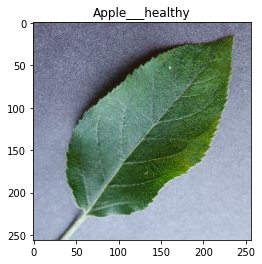

In [4]:
for image,label in train_set.take(5):
  img = image
  img = np.asarray(img)
  print("Label: {}".format(label))
  plt.imshow(img)
  plt.title(get_label_name(label))

input_shape = img.shape
print(input_shape)



# **Saperating the features and labels from PreFetchDatasets**

In [5]:
x_train = []
y_train = []

x_valid = []
y_valid = []

x_test = []
y_test = []

for image,label in train_set.take(-1):
  image = np.asarray(image)
  img = cv2.resize(image,(100,100))
  x_train.append(img)
  y_train.append(label)

for image,label in valid_set.take(-1):
  image = np.asarray(image)
  img = cv2.resize(image,(100,100))
  x_valid.append(img)
  y_valid.append(label)

for image,label in test_set.take(-1):
  image = np.asarray(image)
  img = cv2.resize(image,(100,100))/255.0
  x_test.append(img)
  y_test.append(label)

print("Number of training examples:",len(x_train),"and Number of training labels:",len(y_train))

print("Number of validation examples:",len(x_valid),"and Number of validation labels:",len(y_valid))

print("Number of testinging examples:",len(x_test),"and Number of testing labels:",len(y_test))


x_train = np.asarray(x_train)
x_valid = np.asarray(x_valid)
x_test = np.asarray(x_test)


y_train = np.asarray(y_train)
y_valid = np.asarray(y_valid)
y_test = np.asarray(y_test)

#del train_set 
#del valid_set 
#del test_set 



Number of training examples: 38012 and Number of training labels: 38012
Number of validation examples: 10861 and Number of validation labels: 10861
Number of testinging examples: 5430 and Number of testing labels: 5430


# **Printing Shape, number of classes and class-names**

In [6]:
print('new shape of the images is:',x_train[0].shape)

print('All the labels of the dataset are:',info.features["label"].names)

print('Number of different classes in the dataset are:',len(info.features["label"].names))

new shape of the images is: (100, 100, 3)
All the labels of the dataset are: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry___healthy', 'Cherry___Powdery_mildew', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust', 'Corn___healthy', 'Corn___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spi

# **ImageDataGenerator to control over-fitting**

In [7]:
# Data Augmentation using ImageDataGenerator class

train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

valid_datagen = ImageDataGenerator(rescale = 1.0/255. )

# No need for test datagen because it does not work good in model.evaluate


train_generator = train_datagen.flow(x=x_train,
                                     y=y_train,
                                     batch_size=32,
                                     shuffle=True,)

valid_generator = valid_datagen.flow(x=x_valid,
                                     y=y_valid,
                                     batch_size=32,
                                     shuffle=True,)

#train_batches = train_set.prefetch(tf.data.experimental.AUTOTUNE).shuffle(1000).batch(100)
#valid_batches = valid_set.prefetch(tf.data.experimental.AUTOTUNE).shuffle(1000).batch(100)
#test_batches = test_set.prefetch(tf.data.experimental.AUTOTUNE).shuffle(1000).batch(100)

# **Loading InceptionV3 as a pre_trained model**

In [8]:
#transfer learning
# Download the pre-trained weights. No top means it excludes the fully connected layer it uses for classification.
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Initialize the base model.
# Set the input shape and remove the dense layers.
pre_trained_model = InceptionV3(input_shape = (100, 100, 3), 
                                include_top = False, 
                                weights = 'imagenet')

# Load the pre-trained weights downloaded.
pre_trained_model.load_weights(local_weights_file)


# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False


--2023-01-05 11:07:33--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.115.128, 172.253.122.128, 172.253.63.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.115.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  86.4MB/s    in 1.0s    

2023-01-05 11:07:35 (86.4 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

87910968/87910968 [==============================] - 1s 0us/step


# **Pre_trained model summary**

In [9]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 49, 49, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 49, 49, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

# **Getting a specific layer of the pre_trained model**

In [10]:
# Choose `mixed_0` as the last layer of your base model
last_layer = pre_trained_model.get_layer('mixed0')
print('last layer output shape: ', last_layer.output_shape)

last layer output shape:  (None, 10, 10, 256)


# **Model Architecture**

In [11]:
#model architecture

# ROLL_ID = 361466
# Reverse/ODD = 775173 = kernal sizes in CONV_2D layers

my_model = tf.keras.models.Sequential([
    
    # Conv Block
    
    #last_layer,
    tf.keras.layers.Conv2D(8, (7, 7), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(100,100,3)),
    tf.keras.layers.BatchNormalization(),
	  tf.keras.layers.Conv2D(16, (7, 7), activation='relu', kernel_initializer='he_uniform', padding='same'),
	  tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same'),
	  tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (1, 1), activation='relu', kernel_initializer='he_uniform', padding='same'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (7,7), activation='relu', kernel_initializer='he_uniform', padding='same'),
    #tf.keras.layers.MaxPooling2D((2, 2)),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.Dropout(0.1),

    # Fully Connected Block

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(38,activation='softmax')
])




# **Compiling the model**

In [12]:
my_model.compile(optimizer = 'Adam',
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])

print(x_train.shape)
print(y_train.shape)

(38012, 100, 100, 3)
(38012,)


# **Callbacks for stopping training**

In [15]:
# Callback for stopping tarining

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.92):
      print("\nReached 92% accuracy so cancelling training!")
      self.model.stop_training = True
callbacks = myCallback()

# **Fitting the model**

In [16]:
start_time = time.time()
history = my_model.fit(train_generator,validation_data=valid_generator,epochs=50,callbacks=[callbacks],verbose=1)
elapsed_time = time.time() - start_time
print('Time taken for training: ',elapsed_time/60,'min') 

Epoch 1/50
1188/1188 [==============================] - 125s 106ms/step - loss: 2.8104 - accuracy: 0.2439 - val_loss: 5.0238 - val_accuracy: 0.1717
Epoch 2/50
1188/1188 [==============================] - 126s 106ms/step - loss: 1.9730 - accuracy: 0.4297 - val_loss: 1.7193 - val_accuracy: 0.4931
Epoch 3/50
1188/1188 [==============================] - 125s 105ms/step - loss: 1.4926 - accuracy: 0.5596 - val_loss: 2.0712 - val_accuracy: 0.4605
Epoch 4/50
1188/1188 [==============================] - 120s 101ms/step - loss: 1.2040 - accuracy: 0.6382 - val_loss: 1.8654 - val_accuracy: 0.5256
Epoch 5/50
1188/1188 [==============================] - 142s 120ms/step - loss: 1.0110 - accuracy: 0.6921 - val_loss: 1.0518 - val_accuracy: 0.6905
Epoch 6/50
1188/1188 [==============================] - 121s 102ms/step - loss: 0.8624 - accuracy: 0.7328 - val_loss: 0.7341 - val_accuracy: 0.7692
Epoch 7/50
1188/1188 [==============================] - 119s 100ms/step - loss: 0.7467 - accuracy: 0.7672 - val_

# **Plotting Helper Function**

In [17]:
def summarize_diagnostics(history):
	# plot loss
	plt.subplot(121)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	plt.subplot(122)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	plt.savefig(filename + '_plot.png')
	#plt.close()

# **Evaluating The trained model on test_set**

> 92.781
> 0.232


['loss', 'accuracy']

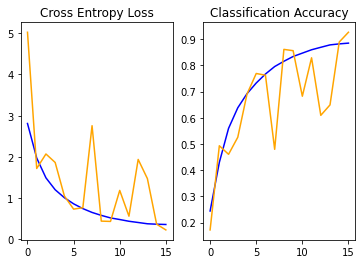

In [18]:
loss, acc = my_model.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))
print('> %.3f' %loss)
# learning curves
summarize_diagnostics(history)
my_model.metrics_names

# **Displaying Model Architecture**

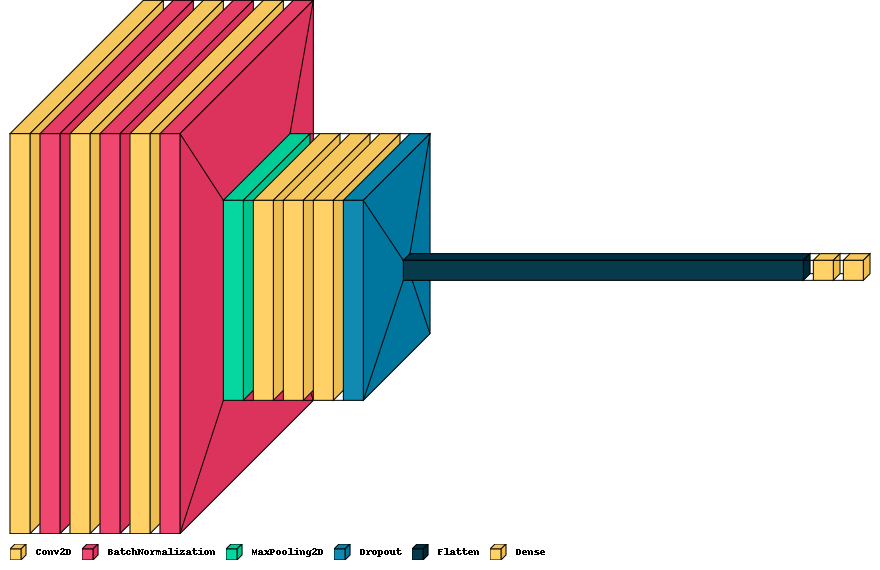

In [19]:
visualkeras.layered_view(my_model,legend=True)

# **Saving trained model in cloud memory**

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
!mkdir -p saved_model
my_model.save('saved_model/Plant_model')
my_model.save('/content/drive/MyDrive/DL Trained Models/Plant_model')

In [22]:
!zip -r /content/Plant_model.zip /content/saved_model/Plant_model

  adding: content/saved_model/Plant_model/ (stored 0%)
  adding: content/saved_model/Plant_model/assets/ (stored 0%)
  adding: content/saved_model/Plant_model/saved_model.pb (deflated 89%)
  adding: content/saved_model/Plant_model/variables/ (stored 0%)
  adding: content/saved_model/Plant_model/variables/variables.index (deflated 71%)
  adding: content/saved_model/Plant_model/variables/variables.data-00000-of-00001 (deflated 23%)
  adding: content/saved_model/Plant_model/keras_metadata.pb (deflated 93%)


# **Prediction function on N Examples**

Label: 18
Original Label Name:  Pepper,_bell___Bacterial_spot
Label: 37
Original Label Name:  Tomato___Tomato_Yellow_Leaf_Curl_Virus
Label: 9
Original Label Name:  Corn___healthy
Label: 24
Original Label Name:  Soybean___healthy
Label: 37
Original Label Name:  Tomato___Tomato_Yellow_Leaf_Curl_Virus
Label: 0
Original Label Name:  Apple___Apple_scab
Label: 15
Original Label Name:  Orange___Haunglongbing_(Citrus_greening)
1/1 [==============================] - 0s 362ms/step
Predicted label name:  18
1/1 [==============================] - 0s 16ms/step
Predicted label name:  37
1/1 [==============================] - 0s 17ms/step
Predicted label name:  9
1/1 [==============================] - 0s 15ms/step
Predicted label name:  24
1/1 [==============================] - 0s 18ms/step
Predicted label name:  37
1/1 [==============================] - 0s 17ms/step
Predicted label name:  0
1/1 [==============================] - 0s 18ms/step
Predicted label name:  15


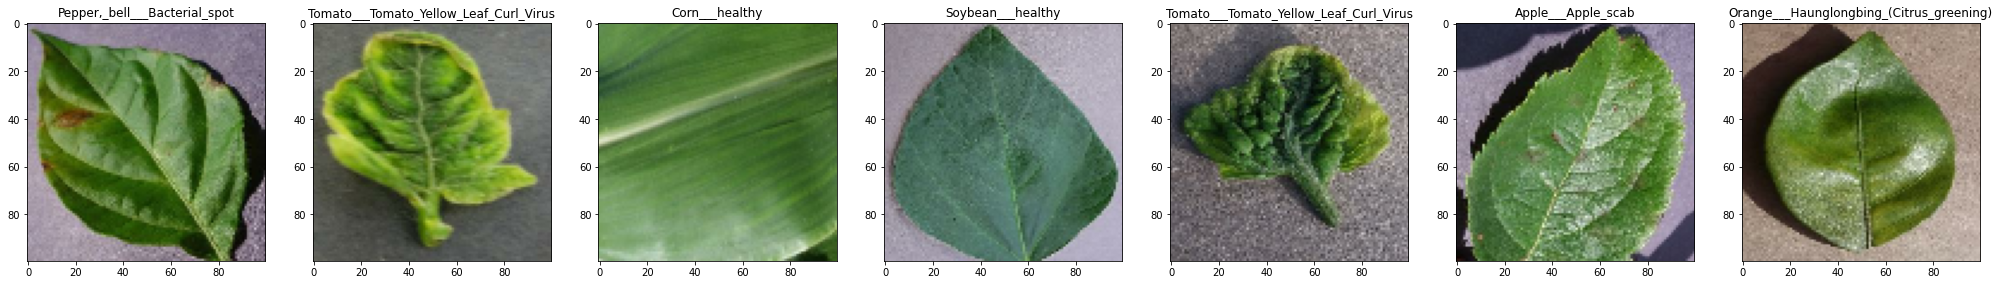

In [23]:
num_examples = 7
prediction_images = []
prediction_labels = []
ts = train_set.shuffle(1000)
fig = plt.figure(figsize=(num_examples*5,num_examples*5))

for img,label in ts.take(num_examples):
  img = np.asarray(img)/255.0
  img = cv2.resize(img,(100,100))
  prediction_images.append(img)
  prediction_labels.append(label)
  print("Label: {}".format(label))
  print('Original Label Name: ',get_label_name(label))

for i in range (1,num_examples+1):
  img = prediction_images[i-1] 
  fig.add_subplot(1,num_examples,i)
  plt.imshow(img)
  input_arr = tf.keras.preprocessing.image.img_to_array(img)
  input_arr = np.array([input_arr])  # Convert single image to a batch.
  prediction = my_model.predict(input_arr)
  p_list = prediction[0].tolist()
  max_prob = max(p_list)
  label = p_list.index(max_prob)
  print('Predicted label name: ',label)
  plt.title(get_label_name(label))

# **Downloading model from cloud memory**

In [ ]:
from google.colab import files
files.download("/content/Plant_model.zip")